Se importan las librerias

In [1]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

Se crean los tensores de los datos de entrenamiento

In [5]:
# create data
Xs = torch.Tensor([[0., 0.],
               [0., 1.],
               [1., 0.],
               [1., 1.]])

y = torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

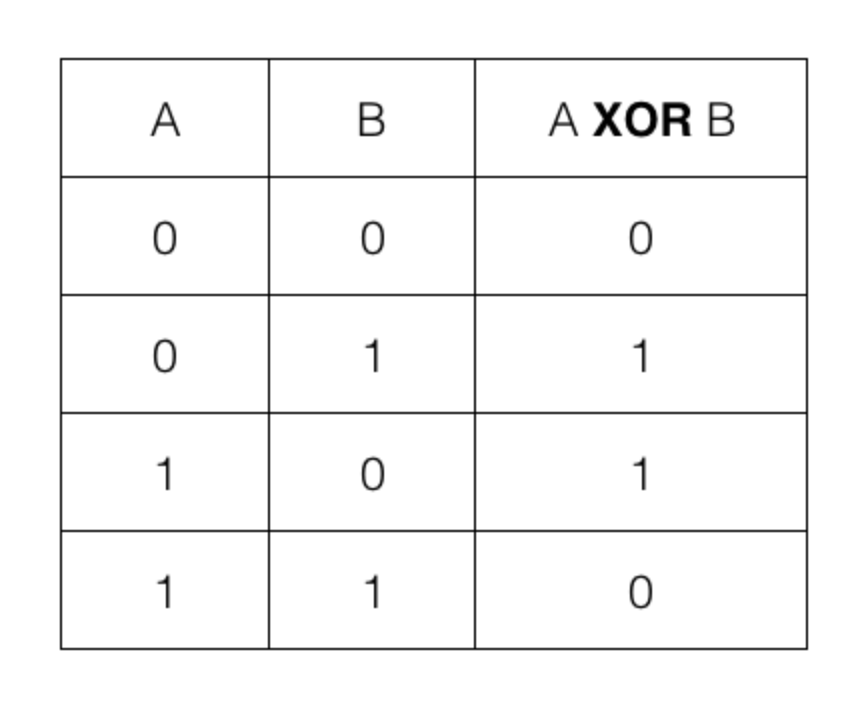

Se crea la arquitectura del perceptron

In [2]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.linear = nn.Linear(2, 2)
        self.Sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1)

    def forward(self, input):
      x = self.linear(input)
      sig = self.Sigmoid(x)
      yh = self.linear2(sig)
      return yh

Se crea la instancia de la clase del modelo

In [3]:
xor_network = XOR()

Se realiza el entrenamiento del modelo

In [6]:
epochs = 1000
mseloss = nn.MSELoss()
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):

  # input training example and return the prediction
  yhat = xor_network.forward(Xs)

  # calculate MSE loss
  loss = mseloss(yhat, y)

  # backpropogate through the loss gradiants
  loss.backward()

  # update model weights
  optimizer.step()

  # remove current gradients for next iteration
  optimizer.zero_grad()

  # append to loss
  current_loss += loss
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0

  # print progress
  if epoch % 500 == 0:
    print(f'Epoch: {epoch} completed')

Epoch: 0 completed
Epoch: 500 completed


In [7]:
all_losses[0].item()

0.007120201364159584

In [8]:
errores = []
for error in all_losses:
  errores.append(error.item())

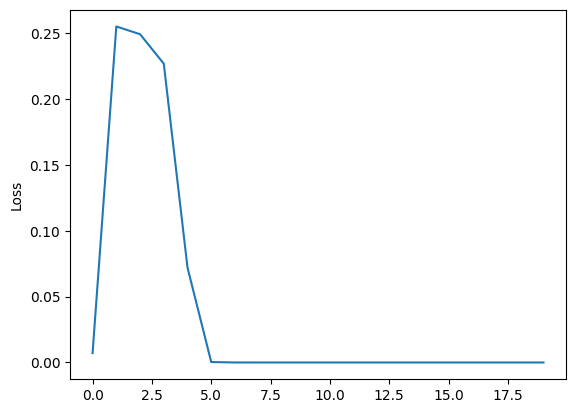

In [9]:
import matplotlib.pyplot as plt
plt.plot(errores)
plt.ylabel('Loss')
plt.show()

In [10]:
# mostrar los pesos y bias
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[ 4.9749, -5.0426],
        [-3.3203,  3.3378]])
linear.bias tensor([-3.2974, -1.7643])
linear2.weight tensor([[1.5075, 1.5445]])
linear2.bias tensor([-0.2796])


In [11]:
# test input
input = torch.tensor([[1., 1.], [1., 0]])
out = xor_network(input)
print(out.round())

tensor([[-0.],
        [1.]], grad_fn=<RoundBackward0>)


### Analizamos un problema mayor



Se crea el conjunto de datos

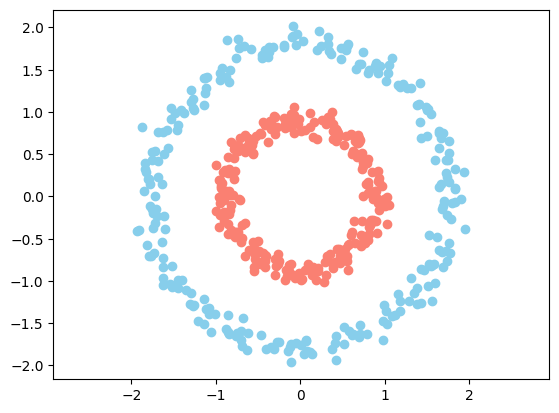

In [12]:
# crear el conjunto d ¡e datos
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
X = (X - X.mean()) / X.std()

Y = Y[:, np.newaxis]

plt.scatter(X[ Y[:,0] == 0, 0], X[ Y[:,0] == 0, 1], c ="skyblue")
plt.scatter(X[ Y[:,0] == 1, 0], X[ Y[:,0] == 1, 1], c ="salmon")
plt.axis("equal")
plt.show()

se convierten los datos de entrenamieto en tensores

In [13]:
#convertir datos de entrenamieto en tensores
X_torch = torch.tensor(X.copy())
Y_torch = torch.tensor(Y.copy()).reshape(X.shape[0], 1)

 se revisa el dispositivo que se puede usar

In [14]:
#usar GPU en caso detener
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(f'Estamos usando: {device}')

Estamos usando: cpu


Se crea la arquitectura de la red neuronal

In [15]:
class MLP(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = self.linear2(x)
        return x

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

Se crea la instancia de la clase

In [16]:
torch.manual_seed(2)
model = MLP(2, 4, 1)

Se inicializan los parámetros para tanto para la función de costo y el criterio de optimización

In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Se inicia inicia el proceso de entrenamiento en base al número de épocas de apredizaje

In [19]:
epochs = 1000
losses = []
xi = X_torch.to(device=device, dtype=torch.float32)
yi = Y_torch.to(device=device, dtype=torch.float32)

for i in range(epochs):
    y_pred = model.forward(xi)
    loss = criterion(y_pred, yi)
    print(f"epoch: {i}, loss: {loss.item()}")

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0, loss: 0.25780054926872253
epoch: 1, loss: 0.25362667441368103
epoch: 2, loss: 0.2514064311981201
epoch: 3, loss: 0.25090551376342773
epoch: 4, loss: 0.2514428198337555
epoch: 5, loss: 0.25207290053367615
epoch: 6, loss: 0.25221434235572815
epoch: 7, loss: 0.25184279680252075
epoch: 8, loss: 0.25120657682418823
epoch: 9, loss: 0.2505826950073242
epoch: 10, loss: 0.2501683831214905
epoch: 11, loss: 0.2500402629375458
epoch: 12, loss: 0.250152051448822
epoch: 13, loss: 0.2503718137741089
epoch: 14, loss: 0.25055232644081116
epoch: 15, loss: 0.2505992650985718
epoch: 16, loss: 0.25049957633018494
epoch: 17, loss: 0.25030604004859924
epoch: 18, loss: 0.25009995698928833
epoch: 19, loss: 0.24995355308055878
epoch: 20, loss: 0.24990317225456238
epoch: 21, loss: 0.24993948638439178
epoch: 22, loss: 0.25001728534698486
epoch: 23, loss: 0.25007978081703186
epoch: 24, loss: 0.2500859797000885
epoch: 25, loss: 0.25002655386924744
epoch: 26, loss: 0.2499224990606308
epoch: 27, loss: 0.249

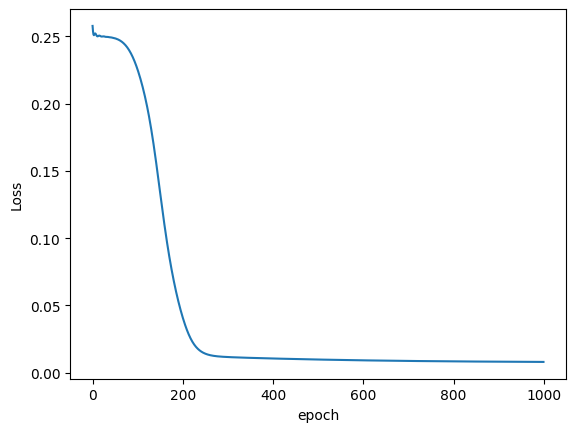

In [20]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

Se realiza el calculo del accuracy

In [21]:
correcto = 0
for i in range(len(X)):
  point = torch.Tensor([X[i][0], X[i][1]])
  prediccion = model.predict(point)
  if(prediccion == Y[i][0]):
    correcto += 1.0

print("Accuracy: %f"%(correcto/len(X)))

Accuracy: 1.000000


In [22]:
prediccion

0

In [ ]:
Y

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
X

array([[-0.33596651,  0.89311103],
       [ 1.48272038,  0.93808599],
       [ 1.67335763, -0.04202385],
       [ 1.76660086,  0.04766334],
       [-0.91552101,  0.22958465],
       [ 1.5723586 , -0.85012477],
       [-1.84772667, -0.37390224],
       [ 0.73148005,  0.46397152],
       [ 1.56806122, -0.72661415],
       [ 0.32757452, -0.74311282],
       [ 0.98231973,  0.30329006],
       [ 0.30354295,  0.93287584],
       [ 1.16778649,  1.43749339],
       [ 0.46038378,  0.66898551],
       [ 0.05013161,  0.85361415],
       [-0.70490157, -1.31339799],
       [ 1.05082304,  1.39134187],
       [ 1.62455019,  0.41893992],
       [-0.62445608, -0.70510173],
       [-1.15938565,  1.13048146],
       [-1.39821041,  1.06210794],
       [ 0.92415666, -0.10866425],
       [ 0.4555077 , -0.72714149],
       [ 0.41319185,  1.6669198 ],
       [-0.87294271, -0.29542132],
       [ 1.16646431, -1.55459178],
       [ 0.22731179,  0.78663412],
       [-1.60013177,  0.44081161],
       [ 1.54674371,